In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.utils import np_utils

dense- neural network layers-how many neurons to be added
conv2d-convolution layer-convoluing the image with the no.of filters we have mentioned
max-pooling is used for pooling layer,reduces the size of the downsampling(reduces the size of the input)
flatten-conversion from 2D to 1D
dropout-some percentage of filters and neurons will be eliminated to avoid overfitting

In [2]:
# to calculate accuracy
from sklearn.metrics import accuracy_score


In [3]:
# Loading the dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


X_train is the image and y_train will be its label
eg: x is cat image y is "its a cat"

In [4]:
#building the input vector from the 28x28 pixels
X_train=X_train.reshape(X_train.shape[0],28,28,1) #1 is channel
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
                


In [5]:
#normalising the data to help  with training(rescaling)
X_train/=255        #X_train=1.0/255->implicit type conversion
X_test/=255


In [6]:
#one hot encoding using keras nummpy related utilities

n_classes=10

print("Shape before one-hot encoding: ",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one hot encoding: ",Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one hot encoding:  (60000, 10)


In [7]:
#building a linear stack of layers with the sequential  model
model=Sequential()

Mask,window,kernel are other names of filters 
In conv2D will pass no.of filters
stride s means positions next  i.e 1 position next
padding = valid means it will not do padding

28,28,1 means image size is 28x28 and 1 means grey scale(1 channel)

In [8]:
#Convolutional layer
model.add(Conv2D(25,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))

In [9]:
model.add(MaxPool2D(pool_size=(1,1)))

In [10]:
#flattenn output of conv
model.add(Flatten())

In [11]:
#hidden layer
model.add(Dense(100,activation='relu'))  #adding neurons

In [12]:
#output layer
model.add(Dense(10,activation='softmax'))

#10=no.of classes
#if it is categorical  we use softmax if is binary we use sigmoid

In [13]:
#compiling the sequential model(training the model)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

for every epoch we have to calculate loss i.e categorical cross entropy loss function .This is selected based on input.If the data is binary,then u shld use binary_crossentropy.If the input is 0-9 , then use sparse loss function
eg:binary=[0,1]
categorical=[[1,0,0],[0,1,0],[0,0,1]]
sparse_categorical=[0,1,2]
for back propogation we need to use optimizers-adam i.e adaptive moment gradient algorithm 

In [14]:
#training the model for 10 epochs(fit the model)
history=model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 [==============================] - 40s 85ms/step - loss: 0.1890 - accuracy: 0.9439 - val_loss: 0.0722 - val_accuracy: 0.9764
Epoch 2/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 3/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 4/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0487 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.0555 - val_accuracy: 0.9832
Epoch 6/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0526 - val_accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0516 - val_accuracy:

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [16]:
import matplotlib.pyplot as plt

In [17]:
epochs=10

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

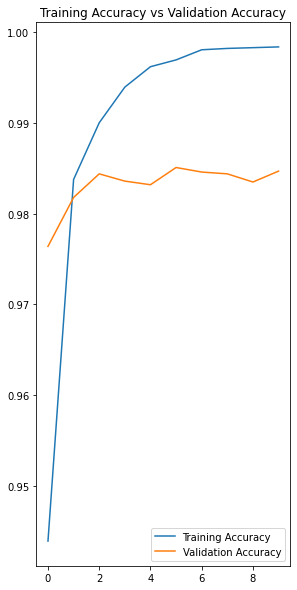

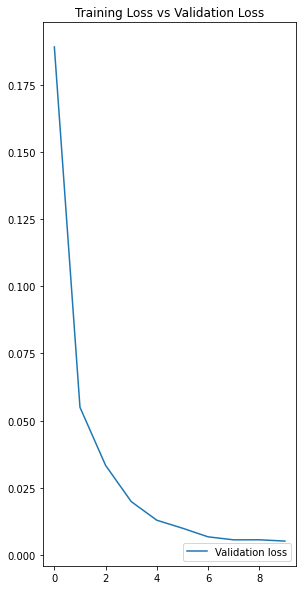

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title('Training Accuracy vs Validation Accuracy')

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training Loss vs Validation Loss')